# Divergence matrix data and hour correlation

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('./../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.divergence_matrix.DivergenceMatrixProcessor import DivergenceMatrixProcessor
from src.state_comparator.comparator_functions import *

divergence_instance = DivergenceMatrixProcessor("./../../data/divergence_matrix/Divergence_M.pickle")

Divegence data is original form.

In [2]:
sensor = "SenzorComunarzi-NatVech"

df_main = divergence_instance.extract_df_with_specific_leak_on_one_node(4.00, sensor)
display(df_main)

,3600,7200,10800,14400,18000,21600,25200,28800,32400,36000,...,54000,57600,61200,64800,68400,72000,75600,79200,82800,86400
"Node_Jonctiune-267, 4.0LPS",0.030256,0.022553,0.021320,0.020701,0.018917,0.026091,0.044295,0.073133,0.091451,0.092362,...,0.061937,0.053872,0.057945,0.064392,0.070717,0.080297,0.078875,0.082186,0.072650,0.046462
"Node_Jonctiune-1224, 4.0LPS",0.008870,0.006704,0.006303,0.006097,0.005556,0.007782,0.012867,0.021119,0.026502,0.026768,...,0.017831,0.015561,0.016670,0.018559,0.020415,0.023241,0.022811,0.023804,0.020980,0.013510
"Node_Jonctiune-1225, 4.0LPS",0.008870,0.006704,0.006303,0.006097,0.005556,0.007782,0.012867,0.021119,0.026502,0.026768,...,0.017831,0.015561,0.016670,0.018559,0.020415,0.023241,0.022811,0.023804,0.020980,0.013510
"Node_Jonctiune-1226, 4.0LPS",0.008870,0.006704,0.006303,0.006097,0.005556,0.007782,0.012867,0.021119,0.026502,0.026768,...,0.017831,0.015561,0.016670,0.018559,0.020415,0.023241,0.022811,0.023804,0.020980,0.013510
"Node_Jonctiune-1404, 4.0LPS",0.031066,0.023444,0.022219,0.021602,0.019819,0.026952,0.044736,0.072276,0.089386,0.090225,...,0.061633,0.053914,0.057813,0.063977,0.069988,0.079021,0.077686,0.080787,0.071821,0.046817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Node_751-B, 4.0LPS",0.012105,0.008789,0.008173,0.007860,0.007013,0.010267,0.016559,0.023842,0.028767,0.029012,...,0.020920,0.018838,0.019889,0.021546,0.023193,0.025761,0.025373,0.026276,0.023714,0.016939
"Node_760-A, 4.0LPS",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,0.000000,0.000002,0.000000,...,0.000000,0.000000,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"Node_760-B, 4.0LPS",0.008754,0.006482,0.006122,0.005937,0.005401,0.007501,0.012082,0.018054,0.022185,0.022384,...,0.015610,0.014010,0.014779,0.016143,0.017524,0.019669,0.019341,0.020104,0.017949,0.012537
"Node_763-A, 4.0LPS",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000002,0.000003,...,0.000000,0.000000,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


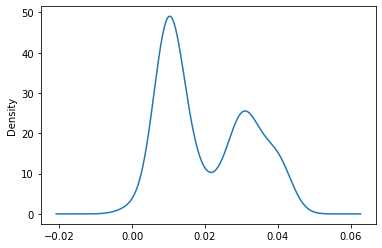

In [3]:
df_main[3600].plot.kde()

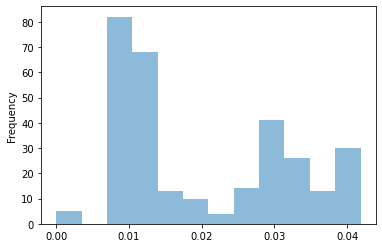

In [4]:
df_main[3600].plot.hist(bins=12, alpha=0.5)

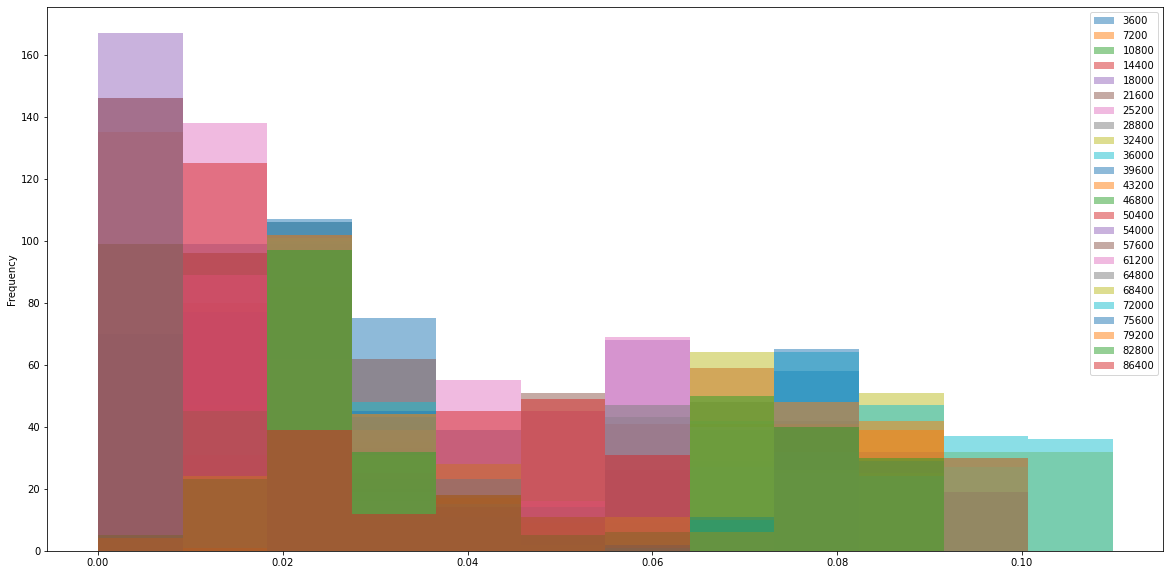

In [5]:
df_main.plot.hist(bins=12, alpha=0.5, figsize=(20,10))

## Example of hour correlation

In [6]:
df_order_corr, df_basic_corr = divergence_instance.calculate_column_correlation(16.0, sensor)
display(df_order_corr, df_basic_corr)

,3600,7200,10800,14400,18000,21600,25200,28800,32400,36000,...,54000,57600,61200,64800,68400,72000,75600,79200,82800,86400
3600,1.0,0.580645,0.580645,0.580645,0.516129,0.645161,0.548387,0.354839,0.516129,0.322581,...,0.548387,0.548387,0.387097,0.483871,0.354839,0.354839,0.354839,0.322581,0.354839,0.548387
7200,0.580645,1.0,0.935484,0.935484,0.870968,0.935484,0.387097,0.193548,0.290323,0.16129,...,0.387097,0.387097,0.258065,0.322581,0.193548,0.193548,0.193548,0.16129,0.193548,0.387097
10800,0.580645,0.935484,1.0,1.0,0.935484,0.903226,0.387097,0.193548,0.290323,0.16129,...,0.387097,0.387097,0.258065,0.322581,0.193548,0.193548,0.193548,0.16129,0.193548,0.387097
14400,0.580645,0.935484,1.0,1.0,0.935484,0.903226,0.387097,0.193548,0.290323,0.16129,...,0.387097,0.387097,0.258065,0.322581,0.193548,0.193548,0.193548,0.16129,0.193548,0.387097
18000,0.516129,0.870968,0.935484,0.935484,1.0,0.83871,0.322581,0.225806,0.354839,0.225806,...,0.322581,0.322581,0.322581,0.387097,0.225806,0.225806,0.225806,0.193548,0.225806,0.322581
21600,0.645161,0.935484,0.903226,0.903226,0.83871,1.0,0.419355,0.225806,0.322581,0.193548,...,0.419355,0.419355,0.290323,0.354839,0.225806,0.225806,0.225806,0.193548,0.225806,0.419355
25200,0.548387,0.387097,0.387097,0.387097,0.322581,0.419355,1.0,0.741935,0.612903,0.612903,...,1.0,1.0,0.806452,0.903226,0.741935,0.741935,0.741935,0.709677,0.741935,1.0
28800,0.354839,0.193548,0.193548,0.193548,0.225806,0.225806,0.741935,1.0,0.612903,0.709677,...,0.741935,0.741935,0.645161,0.806452,1.0,1.0,1.0,0.935484,1.0,0.741935
32400,0.516129,0.290323,0.290323,0.290323,0.354839,0.322581,0.612903,0.612903,1.0,0.741935,...,0.612903,0.612903,0.548387,0.645161,0.612903,0.612903,0.612903,0.645161,0.612903,0.612903
36000,0.322581,0.16129,0.16129,0.16129,0.225806,0.193548,0.612903,0.709677,0.741935,1.0,...,0.612903,0.612903,0.677419,0.645161,0.709677,0.709677,0.709677,0.741935,0.709677,0.612903


,3600,7200,10800,14400,18000,21600,25200,28800,32400,36000,...,54000,57600,61200,64800,68400,72000,75600,79200,82800,86400
3600,1.0,1.0,1.0,1.0,1.0,1.0,0.967742,0.967742,0.967742,0.967742,...,0.967742,0.967742,0.967742,0.967742,0.967742,0.967742,0.967742,0.967742,0.967742,0.967742
7200,1.0,1.0,1.0,1.0,1.0,1.0,0.967742,0.967742,0.967742,0.967742,...,0.967742,0.967742,0.967742,0.967742,0.967742,0.967742,0.967742,0.967742,0.967742,0.967742
10800,1.0,1.0,1.0,1.0,1.0,1.0,0.967742,0.967742,0.967742,0.967742,...,0.967742,0.967742,0.967742,0.967742,0.967742,0.967742,0.967742,0.967742,0.967742,0.967742
14400,1.0,1.0,1.0,1.0,1.0,1.0,0.967742,0.967742,0.967742,0.967742,...,0.967742,0.967742,0.967742,0.967742,0.967742,0.967742,0.967742,0.967742,0.967742,0.967742
18000,1.0,1.0,1.0,1.0,1.0,1.0,0.967742,0.967742,0.967742,0.967742,...,0.967742,0.967742,0.967742,0.967742,0.967742,0.967742,0.967742,0.967742,0.967742,0.967742
21600,1.0,1.0,1.0,1.0,1.0,1.0,0.967742,0.967742,0.967742,0.967742,...,0.967742,0.967742,0.967742,0.967742,0.967742,0.967742,0.967742,0.967742,0.967742,0.967742
25200,0.967742,0.967742,0.967742,0.967742,0.967742,0.967742,1.0,0.967742,1.0,1.0,...,1.0,1.0,1.0,0.967742,0.967742,0.967742,0.967742,0.967742,0.967742,1.0
28800,0.967742,0.967742,0.967742,0.967742,0.967742,0.967742,0.967742,1.0,0.967742,0.967742,...,0.967742,0.967742,0.967742,1.0,1.0,1.0,1.0,1.0,1.0,0.967742
32400,0.967742,0.967742,0.967742,0.967742,0.967742,0.967742,1.0,0.967742,1.0,1.0,...,1.0,1.0,1.0,0.967742,0.967742,0.967742,0.967742,0.967742,0.967742,1.0
36000,0.967742,0.967742,0.967742,0.967742,0.967742,0.967742,1.0,0.967742,1.0,1.0,...,1.0,1.0,1.0,0.967742,0.967742,0.967742,0.967742,0.967742,0.967742,1.0


## Calculation for all of the sensors

In [7]:
sensors = ["SenzorComunarzi-NatVech", "SenzorCernauti-Sebesului", "SenzorChisinau-Titulescu", 
           "SenzorComunarzi-castanului", "751-B", "763-B", "748-B", "760-B"]

order_df = None
basic_df = None
for sensor in sensors:
    print(sensor)
    df_order_corr_temp, df_basic_corr_temp = divergence_instance.calculate_column_correlation(16.0, sensor)
    
    if order_df is None and basic_df is None:
        order_df = df_order_corr_temp
        basic_df = df_basic_corr_temp
    else:
        order_df = order_df.add(df_order_corr_temp)     
        basic_df = basic_df.add(df_basic_corr_temp)        
        # display(basic_df)
        
order_df = order_df.div(len(sensors))
basic_df = basic_df.div(len(sensors))

SenzorComunarzi-NatVech
SenzorCernauti-Sebesului
SenzorChisinau-Titulescu
SenzorComunarzi-castanului
751-B
763-B
748-B
760-B


In [8]:
display(order_df, basic_df)

,3600,7200,10800,14400,18000,21600,25200,28800,32400,36000,...,54000,57600,61200,64800,68400,72000,75600,79200,82800,86400
3600,1.0,0.693548,0.649194,0.657258,0.629032,0.697581,0.604839,0.451613,0.479839,0.427419,...,0.544355,0.556452,0.540323,0.516129,0.475806,0.447581,0.443548,0.435484,0.483871,0.592742
7200,0.693548,1.0,0.91129,0.899194,0.778226,0.802419,0.552419,0.387097,0.391129,0.370968,...,0.483871,0.504032,0.5,0.443548,0.415323,0.350806,0.362903,0.362903,0.395161,0.548387
10800,0.649194,0.91129,1.0,0.955645,0.798387,0.770161,0.53629,0.391129,0.387097,0.358871,...,0.491935,0.508065,0.495968,0.451613,0.407258,0.375,0.379032,0.387097,0.399194,0.540323
14400,0.657258,0.899194,0.955645,1.0,0.814516,0.766129,0.520161,0.383065,0.383065,0.354839,...,0.483871,0.491935,0.479839,0.443548,0.399194,0.366935,0.370968,0.379032,0.391129,0.524194
18000,0.629032,0.778226,0.798387,0.814516,1.0,0.75,0.520161,0.370968,0.379032,0.362903,...,0.439516,0.520161,0.504032,0.447581,0.375,0.391129,0.358871,0.370968,0.395161,0.479839
21600,0.697581,0.802419,0.770161,0.766129,0.75,1.0,0.512097,0.419355,0.383065,0.391129,...,0.459677,0.552419,0.495968,0.435484,0.419355,0.375,0.387097,0.370968,0.395161,0.495968
25200,0.604839,0.552419,0.53629,0.520161,0.520161,0.512097,1.0,0.548387,0.508065,0.512097,...,0.657258,0.71371,0.71371,0.633065,0.584677,0.556452,0.552419,0.540323,0.568548,0.899194
28800,0.451613,0.387097,0.391129,0.383065,0.370968,0.419355,0.548387,1.0,0.653226,0.66129,...,0.741935,0.584677,0.600806,0.721774,0.935484,0.846774,0.862903,0.822581,0.919355,0.560484
32400,0.479839,0.391129,0.387097,0.383065,0.379032,0.383065,0.508065,0.653226,1.0,0.870968,...,0.592742,0.487903,0.495968,0.556452,0.641129,0.677419,0.66129,0.697581,0.653226,0.483871
36000,0.427419,0.370968,0.358871,0.354839,0.362903,0.391129,0.512097,0.66129,0.870968,1.0,...,0.556452,0.495968,0.487903,0.560484,0.649194,0.685484,0.717742,0.721774,0.629032,0.471774


,3600,7200,10800,14400,18000,21600,25200,28800,32400,36000,...,54000,57600,61200,64800,68400,72000,75600,79200,82800,86400
3600,1.0,0.979839,0.979839,0.983871,0.971774,0.979839,0.983871,0.967742,0.96371,0.96371,...,0.971774,0.979839,0.975806,0.971774,0.967742,0.971774,0.971774,0.971774,0.967742,0.987903
7200,0.979839,1.0,1.0,0.995968,0.983871,0.991935,0.979839,0.96371,0.951613,0.951613,...,0.967742,0.967742,0.971774,0.967742,0.96371,0.959677,0.959677,0.959677,0.96371,0.975806
10800,0.979839,1.0,1.0,0.995968,0.983871,0.991935,0.979839,0.96371,0.951613,0.951613,...,0.967742,0.967742,0.971774,0.967742,0.96371,0.959677,0.959677,0.959677,0.96371,0.975806
14400,0.983871,0.995968,0.995968,1.0,0.979839,0.987903,0.979839,0.96371,0.951613,0.951613,...,0.967742,0.967742,0.971774,0.967742,0.96371,0.959677,0.959677,0.959677,0.96371,0.975806
18000,0.971774,0.983871,0.983871,0.979839,1.0,0.979839,0.96371,0.947581,0.939516,0.939516,...,0.951613,0.955645,0.955645,0.951613,0.947581,0.947581,0.947581,0.947581,0.947581,0.96371
21600,0.979839,0.991935,0.991935,0.987903,0.979839,1.0,0.971774,0.96371,0.951613,0.951613,...,0.967742,0.975806,0.971774,0.967742,0.96371,0.967742,0.967742,0.967742,0.96371,0.975806
25200,0.983871,0.979839,0.979839,0.979839,0.96371,0.971774,1.0,0.979839,0.971774,0.971774,...,0.987903,0.987903,0.991935,0.983871,0.979839,0.975806,0.975806,0.975806,0.979839,0.995968
28800,0.967742,0.96371,0.96371,0.96371,0.947581,0.96371,0.979839,1.0,0.975806,0.975806,...,0.991935,0.983871,0.987903,0.995968,1.0,0.995968,0.995968,0.995968,1.0,0.975806
32400,0.96371,0.951613,0.951613,0.951613,0.939516,0.951613,0.971774,0.975806,1.0,1.0,...,0.975806,0.975806,0.971774,0.971774,0.975806,0.979839,0.979839,0.979839,0.975806,0.975806
36000,0.96371,0.951613,0.951613,0.951613,0.939516,0.951613,0.971774,0.975806,1.0,1.0,...,0.975806,0.975806,0.971774,0.971774,0.975806,0.979839,0.979839,0.979839,0.975806,0.975806


In [9]:
display(order_df.mean(), basic_df.mean())

3600     0.548555
7200     0.529234
10800    0.532762
14400    0.526042
18000    0.508065
21600    0.523185
25200    0.603159
28800    0.673051
32400    0.576109
36000    0.575269
39600    0.653226
43200    0.654402
46800    0.668347
50400    0.660450
54000    0.669355
57600    0.621808
61200    0.616095
64800    0.665659
68400    0.678091
72000    0.662802
75600    0.666331
79200    0.658098
82800    0.663138
86400    0.605007
dtype: float64

3600     0.974966
7200     0.970934
10800    0.970934
14400    0.970598
18000    0.958333
21600    0.972110
25200    0.980343
28800    0.983703
32400    0.972110
36000    0.972110
39600    0.983871
43200    0.983871
46800    0.984207
50400    0.983703
54000    0.983367
57600    0.982863
61200    0.982695
64800    0.984039
68400    0.983703
72000    0.983871
75600    0.983871
79200    0.983871
82800    0.983703
86400    0.980511
dtype: float64